In [30]:
import mediapipe as mp
import cv2

mp_face_detection = mp.solutions.face_detection
facedetection = mp_face_detection.FaceDetection(min_detection_confidence=0.4)

img = cv2.imread("pics/nihal/me.jpg")

In [31]:
%%time
predictions = facedetection.process(img)

CPU times: total: 15.6 ms
Wall time: 13 ms


E:\Data Analytics\CN\Face_Recognition\.venv\lib\site-packages\google\protobuf\symbol_database.py:78: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [32]:
predictions.detections

[label_id: 0
 score: 0.904725075
 location_data {
   format: RELATIVE_BOUNDING_BOX
   relative_bounding_box {
     xmin: 0.410367578
     ymin: 0.22419855
     width: 0.285597295
     height: 0.236236
   }
   relative_keypoints {
     x: 0.500906587
     y: 0.280816108
   }
   relative_keypoints {
     x: 0.621937096
     y: 0.301235825
   }
   relative_keypoints {
     x: 0.553525865
     y: 0.345984817
   }
   relative_keypoints {
     x: 0.540228605
     y: 0.39471212
   }
   relative_keypoints {
     x: 0.420645565
     y: 0.290263444
   }
   relative_keypoints {
     x: 0.681605756
     y: 0.33137995
   }
 }]

In [33]:
predictions.detections[0].location_data.relative_bounding_box

xmin: 0.410367578
ymin: 0.22419855
width: 0.285597295
height: 0.236236

In [34]:
x = int(predictions.detections[0].location_data.relative_bounding_box.xmin * img.shape[1])
w = int(predictions.detections[0].location_data.relative_bounding_box.width * img.shape[1])
y = int(predictions.detections[0].location_data.relative_bounding_box.ymin * img.shape[0])
h = int(predictions.detections[0].location_data.relative_bounding_box.height * img.shape[0])

In [35]:
x

972

In [36]:
img.shape

(2864, 2369, 3)

In [37]:
import matplotlib.pyplot as plt

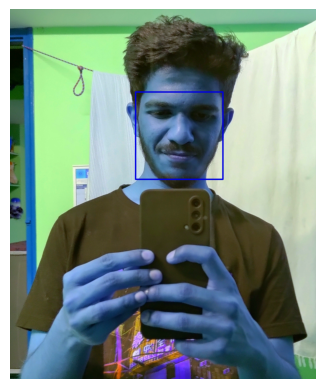

In [38]:
img2 = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 225), 10)
plt.imshow(img2)
plt.axis("off");

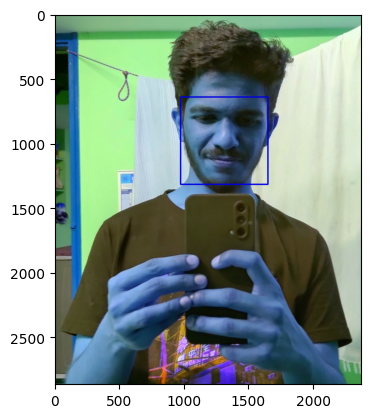

In [39]:
plt.imshow(img)

In [40]:
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

In [41]:
with open('mediapipe_face_detection_models/blaze_face_short_range.tflite', 'rb') as f:
    model = f.read()
    f.close()

In [42]:
model_path = 'blaze_face_short_range.tflite'

In [43]:
BaseOptions = mp.tasks.BaseOptions
FaceDetector = mp.tasks.vision.FaceDetector
FaceDetectorOptions = mp.tasks.vision.FaceDetectorOptions
VisionRunningMode = mp.tasks.vision.RunningMode

# Create a face detector instance with the image mode:
options = FaceDetectorOptions(
base_options=BaseOptions(model_asset_buffer=model),
running_mode=VisionRunningMode.IMAGE)

with FaceDetector.create_from_options(options) as detector:
    mp_image = mp.Image.create_from_file('pics/nihal/me.jpg')
    face_detector_result = detector.detect(mp_image)
    print(face_detector_result)

DetectionResult(detections=[Detection(bounding_box=BoundingBox(origin_x=971, origin_y=628, width=733, height=733), categories=[Category(index=0, score=0.9559603929519653, display_name=None, category_name=None)], keypoints=[NormalizedKeypoint(x=0.5097390413284302, y=0.2812787890434265, label='', score=0.0), NormalizedKeypoint(x=0.6364763975143433, y=0.2941150367259979, label='', score=0.0), NormalizedKeypoint(x=0.5689910054206848, y=0.3461749255657196, label='', score=0.0), NormalizedKeypoint(x=0.5589147806167603, y=0.39968323707580566, label='', score=0.0), NormalizedKeypoint(x=0.4277344048023224, y=0.3011331558227539, label='', score=0.0), NormalizedKeypoint(x=0.6986592411994934, y=0.3302203118801117, label='', score=0.0)])])


In [44]:
face_detector_result.detections[0].bounding_box

BoundingBox(origin_x=971, origin_y=628, width=733, height=733)

In [45]:
x = face_detector_result.detections[0].bounding_box.origin_x
y = face_detector_result.detections[0].bounding_box.origin_y
w = face_detector_result.detections[0].bounding_box.width
h = face_detector_result.detections[0].bounding_box.height

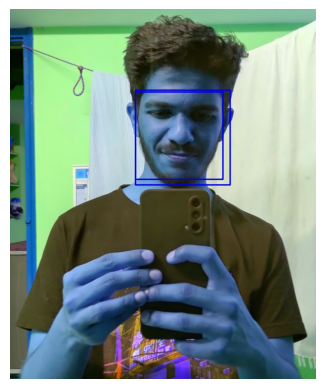

In [46]:
img2 = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 225), 10)
plt.imshow(img2)
plt.axis("off");

In [47]:
from PIL import Image
img = Image.open("pics/nihal/me.jpg")